In [2]:
library(rmarkdown)
library(jsonlite)
library(ggplot2)
library(stringr)
library(corrplot)
library(lubridate)

### Data cleaning 

In [3]:
fr_data <- read.csv("/data/workspace_files/FRvideos.csv")
fr_cat_json <- fromJSON("/data/workspace_files/FR_category_id.json")

In [4]:
fr_data <- fr_data[!(fr_data$video_error_or_removed == "True" || fr_data$comments_disabled == TRUE),]
fr_data <- fr_data[,c("video_id", "trending_date", "title", "channel_title", "category_id", "publish_time", "tags", "views", "likes", "dislikes", "comment_count")]

In [5]:
fr_category <- as.data.frame(cbind(fr_cat_json[["items"]][["id"]], fr_cat_json[["items"]][["snippet"]][["title"]]))
names(fr_category) <- c("category_id","category_title")
fr_data <- merge(x = fr_data, y = fr_category, by = "category_id", all = "TRUE")
fr_data <- na.omit(fr_data)

In [6]:
head(fr_data)

,category_id,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category_title
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,1,sOTxty9jDTs,17.09.12,Michel Drucker (pleure) en larme apres la disparition de Johnny Hallyday,Vidéos AC,2017-12-06T22:44:43.000Z,"druck hallyday""|""drucker hallyday""|""drucker pleure""|""drucker pleur""|""drucker larme""|""michel drucker hallyday""|""drucker hallyday johnny""|""johny halyday""|""johnny hallyday""|""johnny hallyday drucker""|""michel drucker pleure hallyday""|""drucker france2",253728,1154,271,402,Film & Animation
2,1,k48ID5sB3Ig,18.14.04,Aşk ve Mavi 62.Bölüm Fragmanı,Aşk ve Mavi,2018-04-13T20:46:05.000Z,"aşk ve mavi 62""|""ask ve mavi 62""|""aşk ve mavi 62 bölüm fragmanı""|""aşk ve mavi 62 bölüm""|""62.bölüm""|""ask ve mavi 62.bolum""|""ask ve mavi 62.bolum tanitim""|""aşk ve mavi 62 fragman""|""ask ve mavi 62.bolum fragman""|""aşk ve mavi yeni bölüm fragmanı""|""Aşk ve Mavi""|""aşk ve mavi son bölüm fragman izle""|""dizi""|""atv aşk ve mavi""|""aşk ve mavi atv""|""ask ve mavi son bolum fragmani""|""atv""|""aşk ve mavi son bölüm fragman""|""aşk ve mavi fragman""|""aşk ve mavi yeni bölüm""|""aşk ve mavi ali""|""ask""|""mavi""|""ask ve mavi",205146,1724,80,320,Film & Animation
3,1,-EEo2UfM3yM,18.27.04,CHASSEUR DE FANTÔMES : L'Ancien Camp Militaire - Disponible en VOD sur GUSSDX.FR,Chasseur de Fantômes,2018-04-26T18:04:05.000Z,"gussdx""|""guss""|""chasseur de fantômes""|""fantômes""|""enquéte""|""enquéteur""|""paranormal""|""paranormaux""|""phénoménes""|""spiritisme""|""esprit""|""apparition""|""exploration""|""nuit""|""seul""|""orbe""|""mort""|""gironde""|""tanaïs""|""bunker""|""peur""|""nazi""|""allemand""|""ruines""|""allemagne""|""guerre mondiale""|""investigation""|""hanté""|""hantise""|""maison hanté""|""émission""|""ancien camp militaire",21938,2236,83,0,Film & Animation
4,1,vORBMNjmg0o,18.26.01,Petits secrets entre voisins - Une patronne envahissante,P S E V,2018-01-25T12:35:03.000Z,[none],5760,135,5,10,Film & Animation
5,1,AnDW8YNfjAw,18.23.03,CHALLENGE ENTRE SOEURS FAIRE DU SLIME LE PLUS RAPIDEMENT POSSIBLE,ÉlodieCréa,2018-03-22T16:46:12.000Z,FAIRE DU SLIME LE PLUS VITE POSSIBLE CHALLENGE FR,6661,483,10,372,Film & Animation
6,1,REUsZeFWw5I,18.28.03,Beyblade Burst God - Shu vs. Valt 「AMV」| HD,MOAnime,2018-03-26T22:51:59.000Z,[none],197433,2599,98,322,Film & Animation


### Data analysis

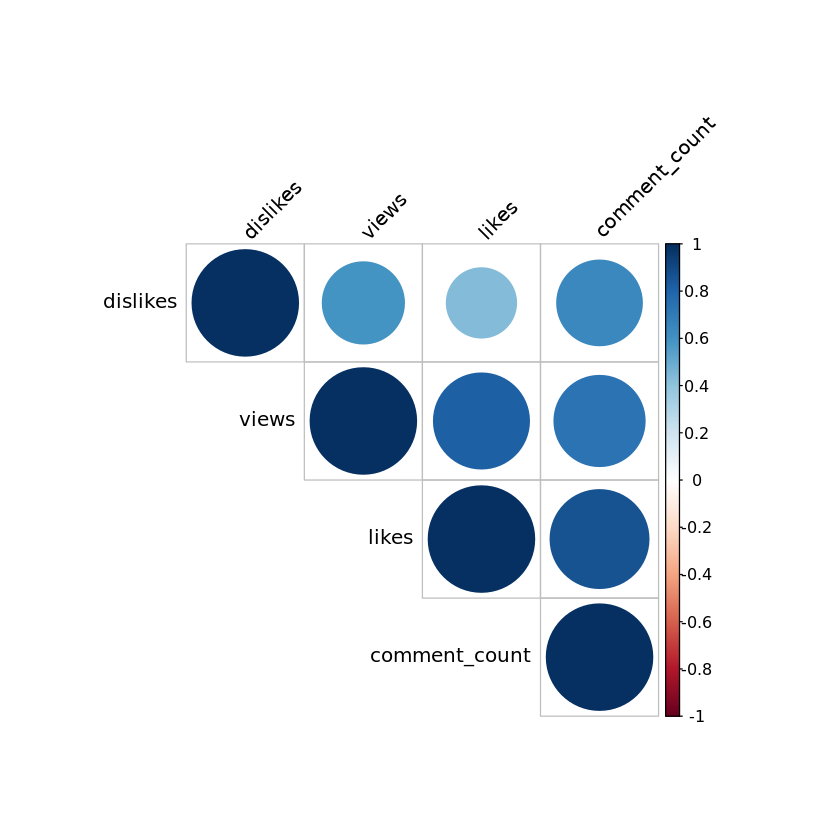

In [7]:
num_data <- fr_data[,c("views","likes","dislikes","comment_count")]
corr <- cor(num_data)
corrplot(corr, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

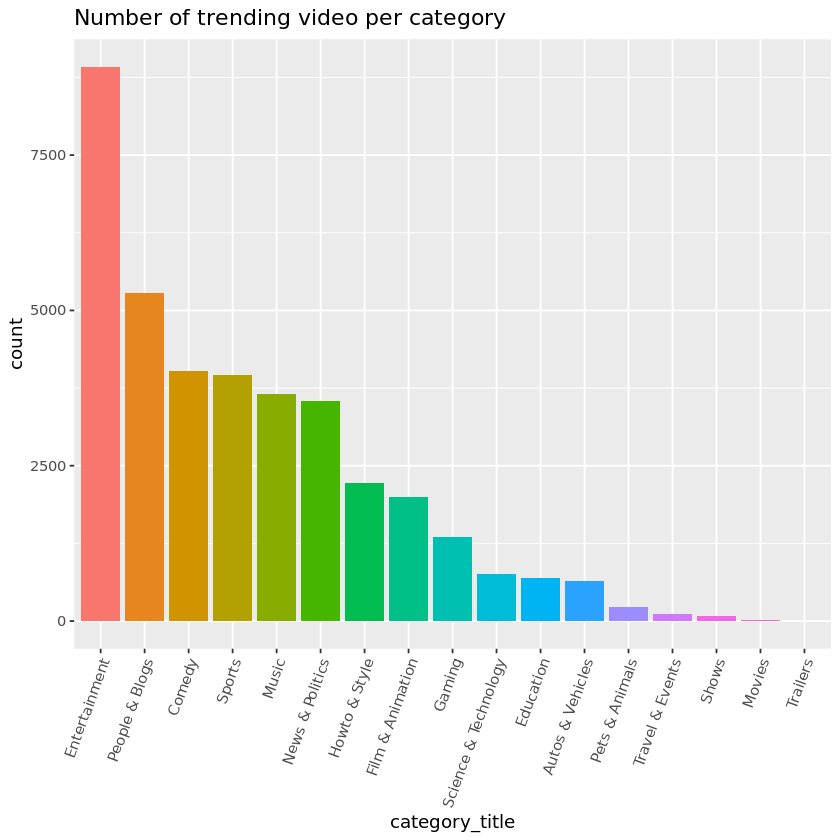

In [11]:
fr_df <- as.data.frame(sort(table(fr_data$category_title), decreasing = TRUE))
names(fr_df) <- c("category_title","count")

ggplot(fr_df, aes(x = category_title, y = count, fill = factor(category_title))) + geom_bar(stat = "identity") + 
theme(axis.text.x = element_text(angle = 70,hjust = 1), legend.position = "none") + labs(title = "Number of trending video per category")

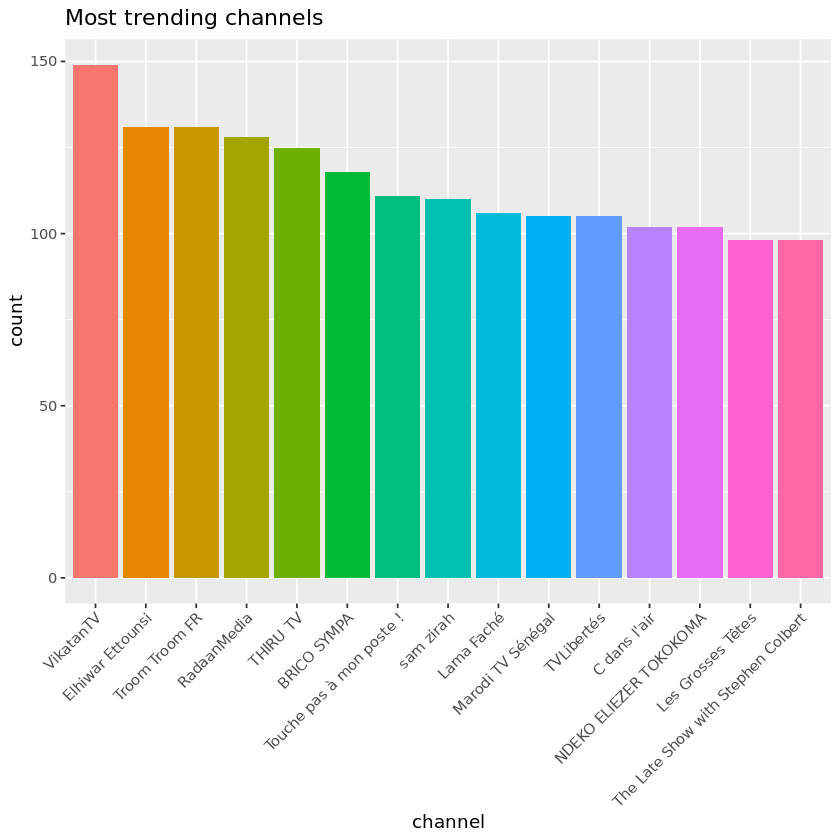

In [18]:
fr_ch_df <- as.data.frame(fr_data$channel_title[!duplicated(fr_data$title)])
names(fr_ch_df) <- c("channel")
fr_ch_df <- as.data.frame(sort(table(fr_ch_df$channel), decreasing = TRUE))
names(fr_ch_df) <- c("channel", "count")

ggplot(fr_ch_df[1:15,], aes(x = channel, y = count, fill = factor(channel))) + geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 45,hjust 
= 1), legend.position = "none")  + labs(title = "Most trending channels")

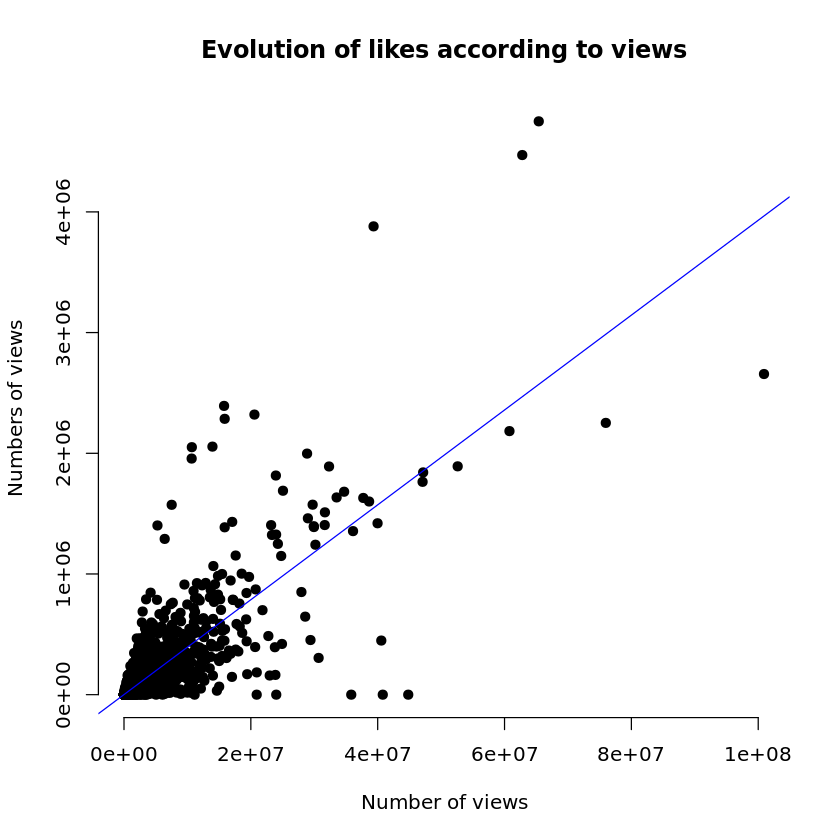

In [20]:
x <- fr_data$views
y <- fr_data$likes
plot(x, y, main = "Evolution of likes according to views",
     xlab = "Number of views", ylab = "Numbers of views",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")

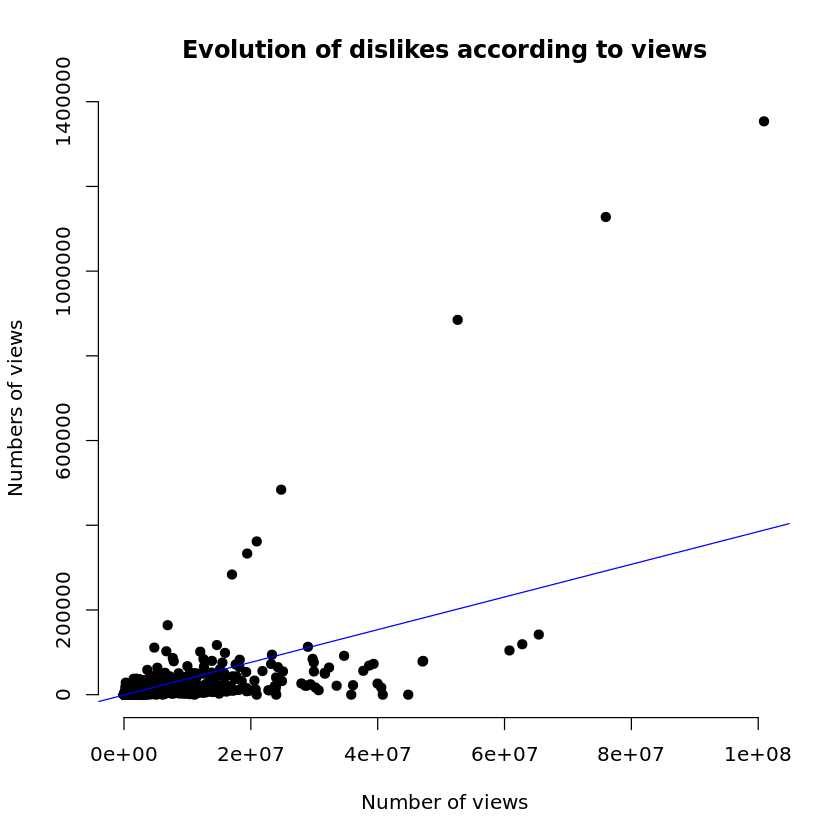

In [119]:
x <- fr_data$views
y <- fr_data$dislikes
plot(x, y, main = "Evolution of dislikes according to views",
     xlab = "Number of views", ylab = "Numbers of views",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")

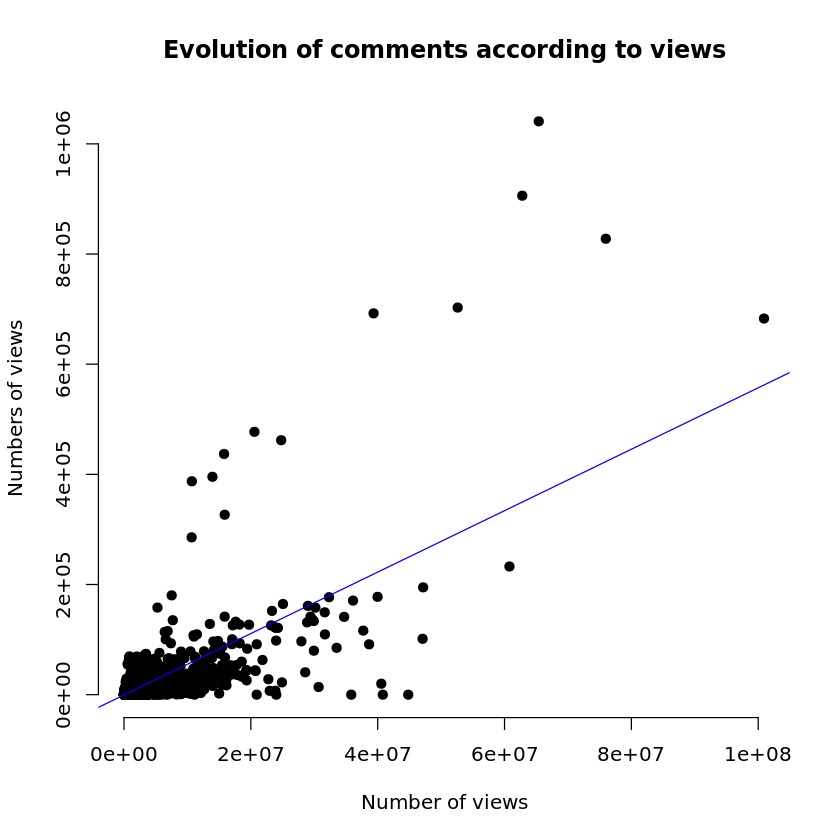

In [120]:
x <- fr_data$views
y <- fr_data$comment_count
plot(x, y, main = "Evolution of comments according to views",
     xlab = "Number of views", ylab = "Numbers of views",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")

### Classification / Explication  ?

Vous pouvez faire des regressions ou similaire ?